#DATASCI W261, Machine Learning at Scale
--------
####Assignement:  week \#5
####[Lei Yang](mailto:leiyang@berkeley.edu) | [Michael Kennedy](mailto:mkennedy@ischool.berkeley.edu) | [Natarajan Krishnaswami](mailto:natarajan@krishnaswami.org)
####Due: 2016-02-25, 8AM PST

###HW6.0. 
In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.

###Answer:



###HW6.1 
Optimization theory: 
For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. Also in python, plot the univartiate function 
$x^3 -12x^2-6$ defined over the real  domain $-6$ to $+6$. 

- Also plot its corresponding first and second derivative functions. 
- Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums.
- Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.

For unconstrained multi-variate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?

###Answer:
For unconstrained univariate optimization:
- **FOC**: the objective function is at minimum or maximum when the first derivative (gradient) equals to zero, namely $f'(x^*)=0$.
- **SOC**: the objective function is at minimum when the second derivative is positive, $f''(x^*)>0$; and at maximum when the second derivative is negative $f''(x^*)<0$.

For unconstrained multi-variate optimization:
- **FOC**: 
Let $f:\mathbb R^n \rightarrow \mathbb R$ be a differentiable at a point $\bar{x}\in\mathbb R^n$. If $\bar{x}$ is a local solution to the problem $minimize/maxmize_{x\in\mathbb R^n} f(x)$, then $\nabla f(\bar{x})=0$

- **SOC**: 
Let $f:\mathbb R^n \rightarrow \mathbb R$ be twice differentiable at the point $\bar{x}\in\mathbb R^n$.
 1. (necessity) if $\bar{x}$ is a local solution to the problem $minimize/maxmize_{x\in\mathbb R^n} f(x)$, then $\nabla f(\bar{x})=0$ and $\nabla^2 f(\bar{x})=0$ is positive semi-definite. 
 2. (sufficiency) if $\nabla f(\bar{x})=0$ and $\nabla^2 f(\bar{x})=0$ is positive semi-definite, then there is an $\alpha>0$ such that $f(x)\geq f(\bar{x})+\alpha |x-\bar{x}|^2$ for all $x$ near $\bar{x}$.
 
Hessian matrix is a square matrix of second-order partial derivatives of a scalar-valued function, or scalar field. It describes the local curvature of a function of many variables. 

###Plotting $f(x)=x^3 -12x^2-6$ defined over the real  domain $-6$ to $+6$
- $\nabla f(x)=3x^2-24x$
- $\nabla^2 f(x)=6x-24$

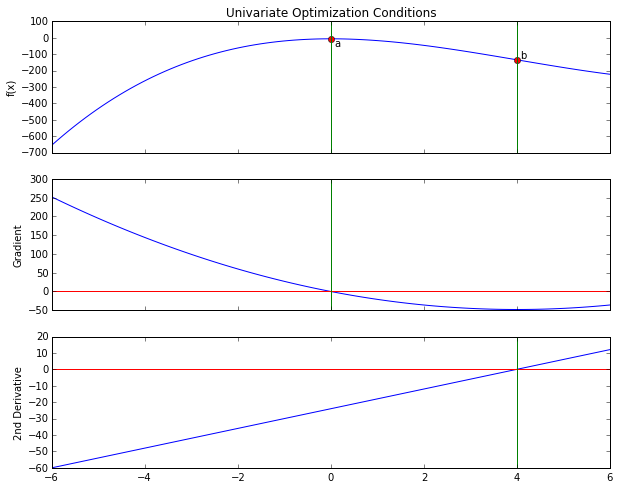

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n=100
x = np.linspace(-6, 6, n)
y_0 = np.zeros(n)
y = [pow(i,3)-12*pow(i,2)-6 for i in x]
yp = [3*pow(i,2)-24*i for i in x]
ypp = [6*i-24 for i in x]
# plot
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches([10,8])
axarr[0].plot(x, y)
axarr[0].plot(0, -6, 'ro')
axarr[0].plot(4, pow(4,3)-12*pow(4,2)-6, 'ro')
axarr[0].set_ylim([-700, 100])
axarr[0].plot(4*np.ones(n), np.linspace(-700,100,n))
axarr[0].plot(0*np.ones(n), np.linspace(-700,100,n), 'g')
axarr[0].set_title('Univariate Optimization Conditions')
axarr[0].set_ylabel('f(x)')
axarr[0].text(0.1, -50, 'a')
axarr[0].text(4.1, pow(4,3)-12*pow(4,2)-6+10, 'b')

axarr[1].plot(x, yp)
axarr[1].plot(x, y_0, 'r')
axarr[1].plot(0*np.ones(n), np.linspace(-50,300,n), 'g')
axarr[1].set_ylabel('Gradient')

axarr[2].plot(x, ypp)
axarr[2].plot(x, y_0, 'r')
axarr[2].plot(4*np.ones(n), np.linspace(-60,20,n))
axarr[2].set_ylabel('2nd Derivative')

plt.show()

###Interpretation
- when the gradient function cross zero at $x=0$, we obtain a ** stationary point $a$** on $f(x=0)=-6$, since $\nabla^2f(x=0)=-24<0$, it is a maximum.
- when the second derivative function crosses zero at $x=4$, we obtain an **inflection point $b$** on $f(x)$

###HW6.2
Taking $x=1$ as the first approximation(xt1) of a root of $X^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as xt2) of this root. (Hint the solution is xt2=1.2)



###HW6.3 Convex optimization 
What makes an optimization problem convex? What are the first order  Necessary Conditions for Optimality in convex optimization.  What are the second order optimality conditions for convex optimization? Are both necessary to determine the maximum or minimum of candidate optimal solutions?

Fill in the BLANKS here:
Convex minimization, a subfield of optimization, studies the problem of minimizing BLANK functions over BLANK sets. The BLANK property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

###HW 6.4
The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:
$$0.5\sum_i{w_i(WX_i-y_i)^2}$$
0.5* sumOverTrainingExample i (weight_i * (W * X_i - y_i)^2)

Where training set consists of input variables $X$ (in vector form) and a target variable $y$, and W is the vector of coefficients for the linear regression model.

Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.

###HW 6.5
Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.

- Generate one million datapoints just like in the following notebook:  
- http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

Weight each example as follows: 

weight(x)= abs(1/x)

Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

###HW6.5.1 (Optional)
- Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. 
- Also plot the current model in the original domain space.  (Plot them side by side if possible)
- Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. 
- Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc.
- Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.


###HW6.6 Clean up notebook for GMM via EM

Using the following notebook as a starting point:

- http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb 

Improve this notebook as follows:
- Add in equations into the notebook (not images of equations) 
- Number the equations
- Make sure the equation notation matches the code and the code and comments refer to the equations numbers
- Comment the code
- Rename/Reorganize the code to make it more readable
- Rerun the examples similar graphics (or possibly better graphics)

###HW6.7 Implement Bernoulli Mixture Model via EM
Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

As a unit test:


As a test: use the same dataset from HW 4.5, the Tweet Dataset. 
Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model  algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using K = 4.  Repeat this experiment using your KMeans MRJob implementation fron HW4.
Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.

Here is some more information on the Tweet Dataset.

Here you will use a different dataset consisting of word-frequency distributions 
for 1,000 Twitter users. These Twitter users use language in very different ways,
and were classified by hand according to the criteria:

0: Human, where only basic human-human communication is observed.

1: Cyborg, where language is primarily borrowed from other sources
(e.g., jobs listings, classifieds postings, advertisements, etc...).

2: Robot, where language is formulaically derived from unrelated sources
(e.g., weather/seismology, police/fire event logs, etc...).

3: Spammer, where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc... )

Check out the preprints of  recent research,
which spawned this dataset:

http://arxiv.org/abs/1505.04342
http://arxiv.org/abs/1508.01843

The main data lie in the accompanying file:

topUsers_Apr-Jul_2014_1000-words.txt

and are of the form:

USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
.
.

where

USERID = unique user identifier
CODE = 0/1/2/3 class code
TOTAL = sum of the word counts

Using this data, you will implement a 1000-dimensional K-means algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using several 
centroid initializations and values of K.


###HW6.8 (Optional) 1 Million songs
Predict the year of the song. Ask Jimi

###stop yarn, hdfs, and job history

In [109]:
!/usr/local/Cellar/hadoop/2*/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2*/sbin/stop-dfs.sh
!/usr/local/Cellar/hadoop/2*/sbin/mr-jobhistory-daemon.sh --config /usr/local/Cellar/hadoop/2*/libexec/etc/hadoop/ stop historyserver 

stopping yarn daemons
stopping resourcemanager
localhost: stopping nodemanager
localhost: nodemanager did not stop gracefully after 5 seconds: killing with kill -9
no proxyserver to stop
Stopping namenodes on [localhost]
localhost: stopping namenode
localhost: stopping datanode
Stopping secondary namenodes [0.0.0.0]
0.0.0.0: stopping secondarynamenode
stopping historyserver


###start yarn, hdfs, and job history

In [2]:
!/usr/local/Cellar/hadoop/2*/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2*/sbin/start-dfs.sh
!/usr/local/Cellar/hadoop/2*/sbin/mr-jobhistory-daemon.sh --config /usr/local/Cellar/hadoop/2*/libexec/etc/hadoop/ start historyserver 

starting yarn daemons
resourcemanager running as process 23891. Stop it first.
localhost: nodemanager running as process 23992. Stop it first.
Starting namenodes on [localhost]
localhost: namenode running as process 24141. Stop it first.
localhost: datanode running as process 24237. Stop it first.
Starting secondary namenodes [0.0.0.0]
0.0.0.0: secondarynamenode running as process 24359. Stop it first.
historyserver running as process 24467. Stop it first.
